In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange, array

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [143]:
housing = pd.read_csv('data/houseprice_clean.csv')
housing.shape 
# 2580 x 81

housing_trimmed = pd.read_csv('data/houseprice_trimmed.csv')
housing_trimmed.shape
# 2464 x 92

housing_newfeat = pd.read_csv('data/houseprice_newfeat.csv')
housing_newfeat.shape
# 2580 x 92

(2580, 92)

In [3]:
housing.columns

Index(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'K

In [120]:
housing_newfeat.columns

Index(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'K

In [10]:
housing.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,Log_SalePrice
0,856,1S_1945older,58.800593,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Normal,126000,11.744037
1,1049,1S_PUD,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,139500,11.845820
2,1001,1S_1945older,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007,C (all),Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Detchd,Unf,TA,Po,N,None,None,None,WD,Normal,124900,11.735269
3,1039,2S_1945older,80.000000,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,N,None,None,None,WD,Normal,114000,11.643954
4,1665,2S_1946newer,70.000000,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,227000,12.332705


## Pipeline: Model and Feature Set Comparison

In [202]:
feature_sets = {
    "Original_features": housing.drop(['SalePrice', 'Log_SalePrice'], axis=1),
    "New_features": housing_newfeat.drop(['SalePrice', 'Log_SalePrice'], axis=1)
}

target_sets = {
    "SalePrice": housing['SalePrice'],
    "Log_SalePrice": housing['Log_SalePrice']
}

In [12]:
# with outliers removed
feature_sets = {
    "Features_trimmed": housing_trimmed.drop(['SalePrice', 'Log_SalePrice'], axis=1),
}

target_sets = {
    "SalePrice": housing_trimmed['SalePrice']
}

In [199]:
col_transform = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), make_column_selector(dtype_include=np.number)),
        ("cat", OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'), 
                 make_column_selector(dtype_include=object))], 
        verbose_feature_names_out = False
)

ridge_pipe = Pipeline(
    steps=[
        ("cols", col_transform), 
        ("regression", Ridge())]
)

lasso_pipe = Pipeline(
    steps=[
        ("cols", col_transform), 
        ("regression", Lasso())]
)

models = {'Ridge': ridge_pipe,
          'Lasso': lasso_pipe
          }

In [203]:
# adapted from https://alfurka.github.io/2018-11-18-grid-search/

def test(models):
    
    r2_train = []
    r2_test = []
    cross_val = []
    mod_details = []
    
    for m in models:
        for f in feature_sets:
            for t in target_sets:
                X = feature_sets[f]
                y = target_sets[t]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
                models[m].fit(X_train, y_train)
                r2_train.append(models[m].score(X_train, y_train))
                r2_test.append(models[m].score(X_test, y_test))
                cross_val.append((cross_val_score(models[m], X, y, cv=10, scoring="r2")).mean())
                mod_details.append(str(m) + '_' + str(f) + '_' + str(t))
        
    results = pd.DataFrame(
                {'Train R^2': r2_train,
                 'Test R^2': r2_test,
                 'Mean CV Score': cross_val
                }, index = mod_details
            )
    
    return results

test(models)

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.947e+10, tolerance: 1.021e+09
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.609e+10, tolerance: 1.264e+09
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

,Train R^2,Test R^2,Mean CV Score
Ridge_Original_features_SalePrice,0.940076,0.917859,0.912472
Ridge_Original_features_Log_SalePrice,0.948302,0.909429,0.917826
Ridge_New_features_SalePrice,0.942243,0.918913,0.906000
Ridge_New_features_Log_SalePrice,0.953836,0.915062,0.924882
Lasso_Original_features_SalePrice,0.942094,0.909819,0.908256
Lasso_Original_features_Log_SalePrice,0.000000,-0.000050,-0.007498
Lasso_New_features_SalePrice,0.944198,0.909480,0.901265
Lasso_New_features_Log_SalePrice,0.000000,-0.000050,-0.007498


In [128]:
# other pipelines to test

feature_sets = {
    "Original_features": housing.drop(['SalePrice', 'Log_SalePrice'], axis=1)
}

target_sets = {
    "SalePrice": housing['SalePrice']
}

poly_pipe = Pipeline(
    steps=[
        ('cols', col_transform),
        ('preprocessor', PolynomialFeatures(degree=2, interaction_only = True, include_bias = False)),
        ('regression', Ridge())
]) # still way overfit!! 


PCA_pipe = Pipeline(
    steps=[
        ('cols', col_transform),
        ('pca', PCA(n_components = 0.99)),
        ('regression', Ridge())
])  # CV: .894

models = {'Ridge': ridge_pipe,
          'Ridge_PCA': PCA_pipe
          }

In [129]:
# adapted from https://alfurka.github.io/2018-11-18-grid-search/

def test(models):
    
    r2_train = []
    r2_test = []
    cross_val = []
    mod_details = []
    
    for m in models:
        for f in feature_sets:
            for t in target_sets:
                X = feature_sets[f]
                y = target_sets[t]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
                models[m].fit(X_train, y_train)
                r2_train.append(models[m].score(X_train, y_train))
                r2_test.append(models[m].score(X_test, y_test))
                cross_val.append((cross_val_score(models[m], X, y, cv=10, scoring="r2")).mean())
                mod_details.append(str(m) + '_' + str(f) + '_' + str(t))
        
    results = pd.DataFrame(
                {'Train R^2': r2_train,
                 'Test R^2': r2_test,
                 'Mean CV Score': cross_val
                }, index = mod_details
            )
    
    return results

test(models)

,Train R^2,Test R^2,Mean CV Score
Ridge_Original_features_SalePrice,0.940076,0.917859,0.912472
Ridge_PCA_Original_features_SalePrice,0.917620,0.921958,0.907687


## Feature Importance

In [39]:
# adapted from https://machinelearningmastery.com/feature-selection-for-regression-data/

In [205]:
# define feature set and target variable
features = housing.drop(['SalePrice', 'Log_SalePrice'], axis=1)
features_new = housing_newfeat.drop(['SalePrice', 'Log_SalePrice'], axis=1)
price = housing['SalePrice']

In [206]:
X = features_new

X_transformed = col_transform.fit_transform(X)
new_feat_names = col_transform.get_feature_names_out()
X = pd.DataFrame(X_transformed, columns = new_feat_names)

y = price

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=1)

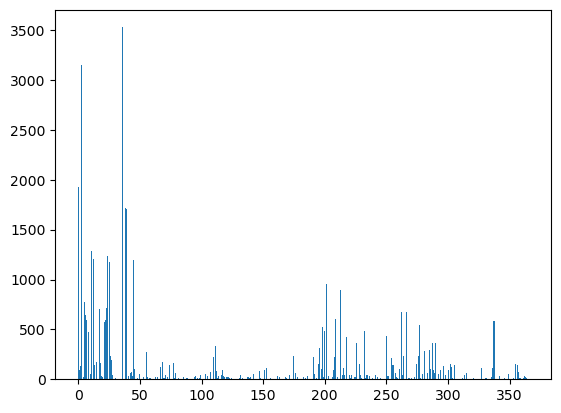

In [59]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
 
    # learn relationship from training data
    fs.fit(X_train, y_train)
 
    # transform train and test data
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# plot the scores
fig, ax = plt.subplots()
ax.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [61]:
selected_features = list(X.columns[fs.get_support()]) # get scores for all features
scores = fs.scores_
feature_imp = pd.DataFrame(scores, index=selected_features)
feature_imp.columns = ['imp']
feature_imp.sort_values('imp', ascending = False).head(10)

,imp
TotalIndoorSF,3529.350366
OverallQual,3154.760838
GrLivArea,1932.523438
LivArea_sq,1721.454014
Log_LivArea,1709.399754
TotalBsmtSF,1288.978111
GarageCars,1240.461648
1stFlrSF,1203.705055
Neighborhood_Num,1196.274623
GarageArea,1172.603032


In [62]:
feature_imp[feature_imp['imp'] == 0]

,imp
MSSubClass_1halfS_PUD,0.0
MSZoning_A (agr),0.0
Neighborhood_Landmrk,0.0
Condition2_Artery,0.0
Condition2_RRAn,0.0
RoofMatl_Membran,0.0
RoofMatl_Metal,0.0
Electrical_None,0.0
Functional_Sal,0.0
PoolQC_Ex,0.0


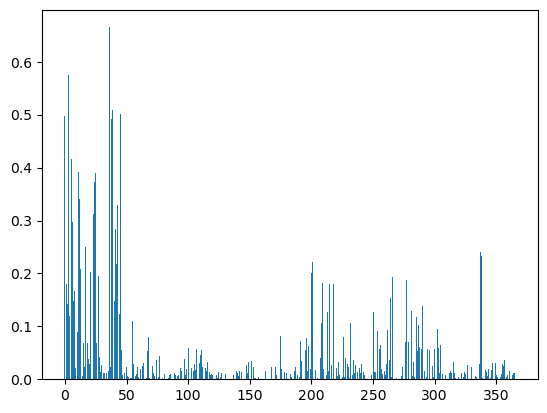

In [63]:
# same as above, with with 'mutual info regression'

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
 
    # learn relationship from training data
    fs.fit(X_train, y_train)
 
    # transform train and test data
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# plot the scores
fig, ax = plt.subplots()
ax.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [64]:
# top 10 features vary slightly from above
# magnitude of scores are very different

selected_features = list(X.columns[fs.get_support()])
scores = fs.scores_
feature_imp = pd.DataFrame(scores, index=selected_features)
feature_imp.columns = ['imp']
feature_imp.sort_values('imp', ascending = False).head(10)

,imp
TotalIndoorSF,0.665101
OverallQual,0.575197
Log_LivArea,0.508781
Neighborhood_Num,0.501075
GrLivArea,0.497718
LivArea_sq,0.491789
YearBuilt,0.415738
TotalBsmtSF,0.391269
GarageArea,0.390569
GarageCars,0.372023


In [65]:
feature_imp[feature_imp['imp'] == 0]
feature_imp[feature_imp['imp'] == 0].shape

(82, 1)

In [63]:
sel_mutualreg = list(feature_imp[feature_imp['imp'] != 0].index)
feat_mutualreg = features_scaled[sel_mutualreg]
feat_mutualreg.shape

(2580, 211)

In [207]:
sel_ = SelectFromModel(Lasso(alpha = 68))
sel_.fit(X_train, y_train)

selected_feat = X.columns[(sel_.get_support())]
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 338
selected features: 124
features with coefficients shrank to zero: 213


In [208]:
selected_feat

Index(['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'GarageType_None', 'GarageFinish_Fin', 'GarageFinish_Unf',
       'GarageQual_TA', 'GarageCond_Fa', 'Fence_MnPrv',
       'SaleCondition_Abnorml', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'GarageSize_large'],
      dtype='object', length=124)

## Ridge Regression

In [89]:
X = features_new

X_transformed = col_transform.fit_transform(X)
new_feat_names = col_transform.get_feature_names_out()
X = pd.DataFrame(X_transformed, columns = new_feat_names)

y = price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [90]:
ridge = Ridge()
ridge.fit(X_train, y_train)

cv = KFold(n_splits=10, shuffle = True, random_state = 0)
scores = cross_val_score(ridge, X_test, y_test, cv=cv, scoring="r2")

print(scores)
print(f"Average R-squared score: {scores.mean()}")

[0.87476666 0.94024098 0.94298891 0.94150024 0.93007264 0.89529846
 0.9060509  0.8828613  0.79896733 0.92268708]
Average R-squared score: 0.9035434505512011


In [91]:
params1 = {"alpha": [0.001, 0.01, 1, 100, 1000, 10000, 100000]} # 100
params2 = {"alpha": arange(1, 1000, 50)} # 51
params3 = {"alpha": arange(0, 100, 1)} # 50

ridge = Ridge()
cv = KFold(n_splits=10, shuffle = True, random_state = 0)
gs = GridSearchCV(ridge, params3, scoring='r2', cv=cv)
gs.fit(X_train, y_train)

scores = cross_val_score(gs.best_estimator_, X, y, cv=cv, scoring="r2")

print(gs.best_params_)
print(scores.mean())

{'alpha': 50}
0.9030636437502533


In [93]:
ridge = Ridge(alpha = 50)
cv = KFold(n_splits=10, shuffle = True, random_state = 0)

ridge.fit(X_train, y_train)

scores = cross_val_score(ridge, X_train, y_train, cv=cv, scoring="r2")
scores.mean()

# estimation of train/test scores
# use predict with actual test set

0.9030636437502533

In [94]:
ridge.coef_ == 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [95]:
alphas_ridge = arange(0, 60)
coefs_ridge = []
scores_ridge = []

for alpha in alphas_ridge:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    scores_ridge.append(ridge.score(X_test, y_test))
coefs_ridge = pd.DataFrame(coefs_ridge, index=alphas_ridge, columns=X_train.columns)
coefs_ridge.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Remodel_binary,TotalIndoorSF,LotPercent,LivArea_sq,Log_LivArea,Remodel_Year,Remodel_Qual,Remodel_GrLiv,Remodel_TotSF,Remodel_Bath,Neighborhood_Num,MSSubClass_1S_1945older,MSSubClass_1S_1946newer,MSSubClass_1S_PUD,MSSubClass_1S_finishedattic,MSSubClass_1_2S_finished,MSSubClass_1_2S_unfinished,MSSubClass_1halfS_PUD,MSSubClass_2Fam_conversion,MSSubClass_2S_1945older,MSSubClass_2S_1946newer,MSSubClass_2S_PUD,MSSubClass_2halfS,MSSubClass_Multi_PUD,MSSubClass_duplex,MSSubClass_splitfoyer,MSSubClass_splitlevel,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageSize_large,GarageSize_small,Remodel_Neighborhood_Blmngtn,Remodel_Neighborhood_Blueste,Remodel_Neighborhood_BrDale,Remodel_Neighborhood_BrkSide,Remodel_Neighborhood_ClearCr,Remodel_Neighborhood_CollgCr,Remodel_Neighborhood_Crawfor,Remodel_Neighborhood_Edwards,Remodel_Neighborhood_Gilbert,Remodel_Neighborhood_Greens,Remodel_Neighborhood_IDOTRR,Remodel_Neighborhood_Landmrk,Remodel_Neighborhood_MeadowV,Remodel_Neighborhood_Mitchel,Remodel_Neighborhood_NAmes,Remodel_Neighborhood_NWAmes,Remodel_Neighborhood_NoRidge,Remodel_Neighborhood_NridgHt,Remodel_Neighborhood_OldTown,Remodel_Neighborhood_SWISU,Remodel_Neighborhood_Sawyer,Remodel_Neighborhood_SawyerW,Remodel_Neighborhood_Somerst,Remodel_Neighborhood_StoneBr,Remodel_Neighborhood_Timber,Remodel_Neighborhood_Veenker,Remodel_Neighborhood_nan
0,-5.094912e+17,-2138.167598,5104.715478,7011.550842,7305.971450,17343.070259,3268.284275,4709.084470,3.997115e+17,1.623581e+17,3.959026e+17,3.167552e+17,1.026243e+18,1.157577e+18,1.212071e+17,2270.549290,1502.309239,486.566579,1250.166007,-2422.977911,-523.928033,834.672306,4935.259916,-454.150961,5062.216514,2143.309907,807.103603,-1398.185491,131.891734,638.838130,2202.994519,-7622.955468,-259.539565,-274.287735,997.065184,2.153135e+17,-1.287392e+18,-1918.306678,-35542.735708,-50315.581698,-291408.013691,5514.549481,3142.236614,2376.596051,1012.870716,-3.001263e+17,6.732251e+17,6.732251e+17,6.732251e+17,6.732251e+17

Text(0, 0.5, 'slope values')

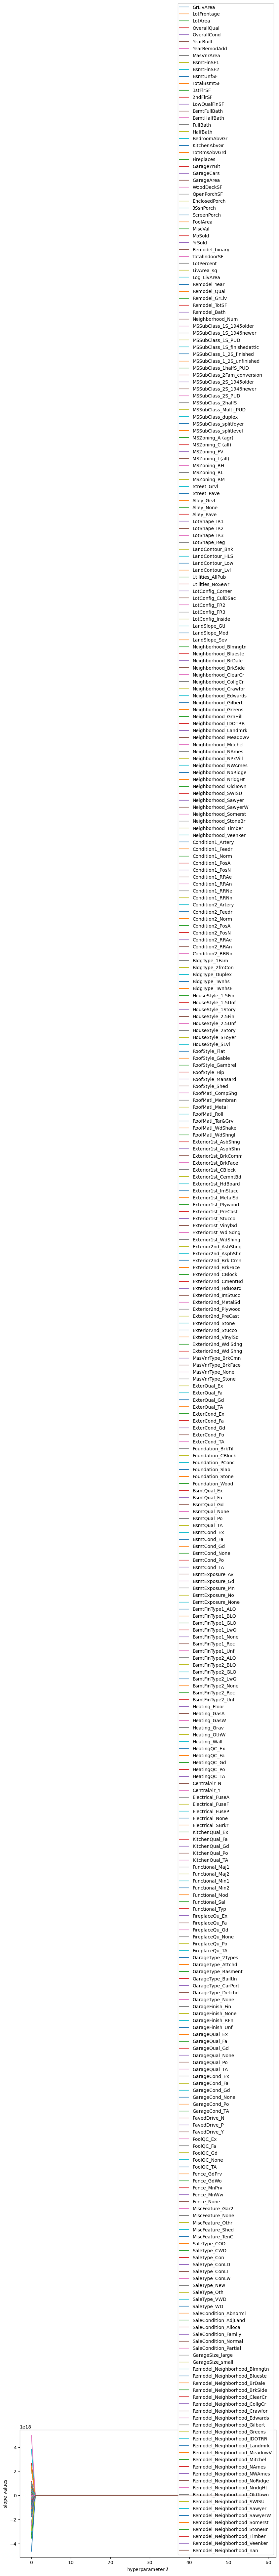

In [96]:
# why is the grid search returning 50 as the optimum alpha?
# why is R^2 increasing instead of decreasing?

plt.rcParams['figure.figsize'] = (10,5)
for name in coefs_ridge.columns:
    plt.plot(coefs_ridge.index, coefs_ridge[name], label=name)
plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

#plt.ylim((-3,3))

Text(0, 0.5, '$R^2$')

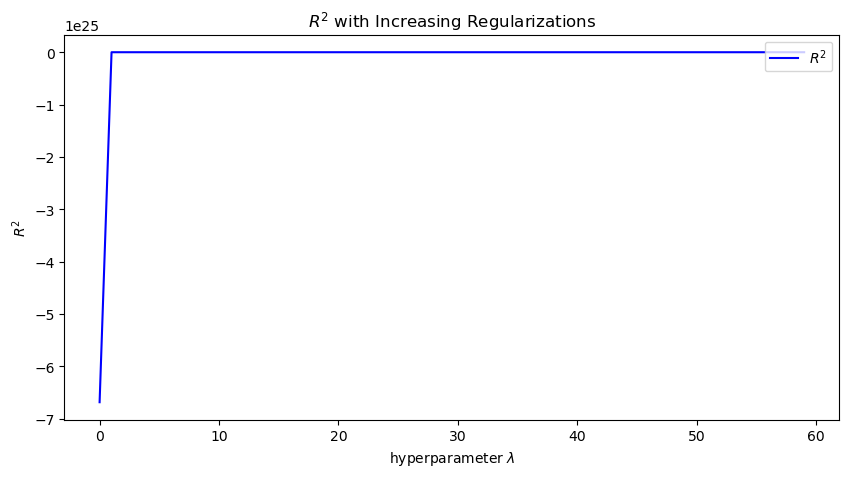

In [97]:
plt.plot(alphas_ridge, scores_ridge, c="b", label=r"$R^2$")
plt.legend(loc=1)
plt.title(r"$R^2$ with Increasing Regularizations")
plt.xlabel(r"hyperparameter $\lambda$")
plt.ylabel(r"$R^2$")

## Lasso Regression

In [170]:
X = features_new
y = price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [165]:
lasso_pipe = Pipeline(
    steps=[
        ("cols", col_transform), 
        ("regression", Lasso())]
)

In [176]:
params1 = {"regression__alpha": [0.0001, 0.01, 1, 100, 10000, 100000]} # 100, R^2 89.4
params2 = {"regression__alpha": arange(1, 10000, 100)} # 101, R^2 89.4
params3 = {"regression__alpha": arange(1, 200, 10)} # 71, R^2 89.4
params4 = {"regression__alpha": arange(60, 80, 1)} # 68, R^2 89.4

cv = KFold(n_splits=5, shuffle = True, random_state = 0)
gs = GridSearchCV(lasso_pipe, params4, scoring='r2', cv=cv)
gs.fit(X_train, y_train)

scores = cross_val_score(gs.best_estimator_, X, y, cv=cv, scoring="r2")

print(gs.best_params_)
print(scores.mean())

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.174e+10, tolerance: 8.237e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.015e+10, tolerance: 8.234e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.182e+10, tolerance: 8.237e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.185e+10, tolerance: 8.237e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

{'regression__alpha': 68}
0.8936616073036989


/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.121e+10, tolerance: 1.121e+09
  model = cd_fast.enet_coordinate_descent(


In [181]:
lasso = gs.best_estimator_.named_steps['regression']
lasso

Lasso(alpha=68)

In [192]:
new_vars = gs.best_estimator_.named_steps['cols'].get_feature_names_out()

coefs_lasso = pd.DataFrame(lasso.coef_, index = new_vars, columns = ['coef'])
coefs_lasso.head()

,coef
GrLivArea,26220.666197
LotFrontage,-1399.025074
LotArea,3172.659827
OverallQual,10197.786053
OverallCond,6283.486524


In [193]:
coefs_lasso[coefs_lasso['coef'] == 0].shape

(217, 1)

In [194]:
coefs_lasso.sort_values(by = 'coef', ascending = False).head(10)

,coef
Condition2_PosA,27151.467268
ExterQual_Ex,26721.114789
GrLivArea,26220.666197
Neighborhood_StoneBr,24172.214164
KitchenQual_Ex,16754.764816
BsmtQual_Ex,16543.005800
RoofMatl_WdShngl,16343.745330
SaleCondition_Partial,14689.504269
BsmtExposure_Gd,13613.545608
Exterior1st_BrkFace,12828.498224


In [197]:
lasso_selected_features = coefs_lasso[coefs_lasso['coef'] != 0]
lasso_selected_features = lasso_selected_features.index
lasso_selected_features

Index(['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleCondition_Partial', 'GarageSize_large', 'GarageSize_small',
       'Remodel_Neighborhood_CollgCr', 'Remodel_Neighborhood_Crawfor',
       'Remodel_Neighborhood_NAmes', 'Remodel_Neighborhood_NoRidge',
       'Remodel_Neighborhood_OldTown', 'Remodel_Neighborhood_SWISU',
       'Remodel_Neighborhood_Somerst'],
      dtype='object', length=135)

In [188]:
alphas = arange(0, 100)
coefs_lasso = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index=alphas, columns=X_train.columns)
coefs_lasso.head()

/var/folders/br/94g31g292jj5vykvq71cy53m0000gn/T/ipykernel_51693/947572620.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)


ValueError: could not convert string to float: '1S_finishedattic'

Text(0, 0.5, 'slope values')

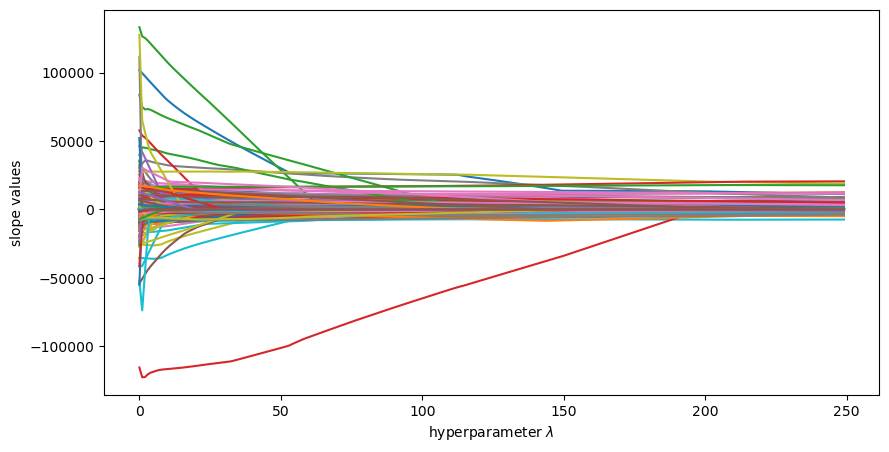

In [142]:
plt.rcParams["figure.figsize"] = (10, 5)
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.legend('',frameon=False)
plt.xlabel(r"hyperparameter $\lambda$")
plt.ylabel(r"slope values")

# plt.xlim((150, 250))

In [ ]:
# cols = X.columns[gs.best_estimator_.named_steps['selector'].get_support()]
# coefs = gs.best_estimator_.named_steps['model'].coef_

coefs = pd.DataFrame(coefs, index=cols)
coefs.columns = ['coef']
coefs.sort_values(by = 'coef', ascending = False)

## ElasticNet

In [114]:
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)

cv = KFold(n_splits=10, shuffle = True, random_state = 0)
scores = cross_val_score(elasticnet, X, y, cv=cv, scoring="r2")

print(f"Average R-squared score: {scores.mean()}")

Average R-squared score: 0.8778506882951161


In [116]:
arange(0,1.1,.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [118]:
params = {"alpha": [0.0001, 0.01, 1, 100, 10000, 1000000],
         "l1_ratio": arange(0,1.1,.1)} 

gs = GridSearchCV(elasticnet, params, scoring='r2', cv=cv)
gs.fit(X_train, y_train)

scores = cross_val_score(gs.best_estimator_, X, y, cv=cv, scoring="r2")

print(gs.best_params_)
print(scores.mean())

# l1_ratio = 0 is a Ridge regression

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.729e+11, tolerance: 9.149e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.600e+11, tolerance: 9.151e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solv

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.610e+11, tolerance: 9.068e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.735e+11, tolerance: 9.238e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.577e+11, tolerance: 9.151e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.616e+11, tolerance: 9.100e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.461e+11, tolerance: 8.967e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.640e+11, tolerance: 9.100e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.819e+11, tolerance: 8.922e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.567e+11, tolerance: 9.068e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.636e+11, tolerance: 9.149e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.545e+11, tolerance: 9.151e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solv

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.388e+11, tolerance: 9.068e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.547e+11, tolerance: 9.238e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.315e+11, tolerance: 9.151e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.360e+11, tolerance: 9.100e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.203e+11, tolerance: 8.967e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.244e+11, tolerance: 9.100e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.046e+11, tolerance: 8.922e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.023e+11, tolerance: 9.068e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.014e+12, tolerance: 9.149e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+12, tolerance: 9.151e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solv

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.370e+11, tolerance: 9.068e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.480e+11, tolerance: 9.238e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.479e+12, tolerance: 8.967e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.546e+12, tolerance: 9.100e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solv

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.619e+12, tolerance: 9.238e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.903e+11, tolerance: 1.006e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solv

{'alpha': 0.01, 'l1_ratio': 0.0}
0.9028549519489703


/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.774e+11, tolerance: 1.260e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [ ]:
cols = X.columns[gs.best_estimator_.named_steps['selector'].get_support()]
coefs = gs.best_estimator_.named_steps['model'].coef_

coefs = pd.DataFrame(coefs, index=cols)
coefs.columns = ['coef']
coefs.sort_values(by = 'coef', ascending = False)